### 演示K-Mean聚类过程
- 根据中心点，对数据进行聚类划分
- 根据现有数据的划分，重新计算中心点

In [2]:
# encoding:utf-8

import random, math
import numpy as np
import pylab as pl

%matplotlib inline  

In [3]:
# 数据准备
def data_loader():
    samples = list()
    centers = [(-1.0, 0.0), (1.0, 0.0),
               (0.0, -1.0), (0.0, 1.0)]
    for center in centers:
        samples.extend(zip(np.random.normal(center[0], 0.25, 100),
                           np.random.normal(center[1], 0.25, 100)))
    return samples

In [4]:
# 定义数据之间的相似度
def cosine_similarity(v1,v2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x, y = v1[i], v2[i]
        sumxx += x * x
        sumyy += y * y
        sumxy += x * y
    if not sumxx > 0 or not sumyy > 0:
        return 0.0
    return sumxy / math.sqrt(sumxx * sumyy)

In [5]:
# 对结果进行绘图展示
def plot_points(points, assigns=None, colors=None, markers=None):
    if assigns is not None:
        colors = [basic_colors[i] for i in assigns]
        markers = [basic_markers[i] for i in assigns]
    if colors is None or markers is None:
        colors = ['r' for _ in points]
        markers = ['+' for _ in points]
    for p, c, m in zip(points, colors, markers):
        pl.scatter(p[0], p[1], c=c, marker=m)
    pl.title('dataset with %d clusters and known outcomes.' % cluster_num)
    pl.show()

In [6]:
# 重新分配中心
def assign(points, centers):
    assigns = list()
    for point in points:
        simis = list()
        for center in centers:
            simis.append(cosine_similarity(point, center))
        assigns.append(np.argmax(np.asarray(simis)))
    return assigns

In [7]:
# 重新计算中心
def calc_centers(points, assigns):
    uniq_assigns = set(assigns)
    new_centers = [np.zeros_like(points[0]) for _ in range(len(uniq_assigns))]
    for point, assi in zip(points, assigns):
        new_centers[assi] += point
    return new_centers

In [8]:
cluster_num = 4
basic_colors = ['r', 'g', 'b', 'y']
basic_markers = ['+', 'o', '*', '^']
datas = data_loader()
centers = random.sample(datas, cluster_num)

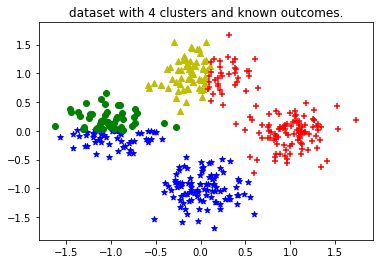

In [9]:
assigns = assign(datas, centers)
centers = calc_centers(datas, assigns)
plot_points(datas, assigns)

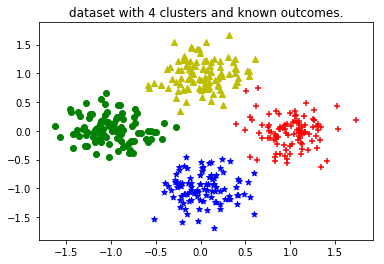

In [10]:
assigns = assign(datas, centers)
centers = calc_centers(datas, assigns)
plot_points(datas, assigns)

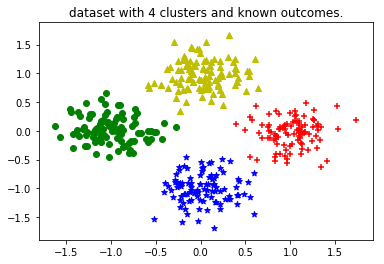

In [11]:
assigns = assign(datas, centers)
centers = calc_centers(datas, assigns)
plot_points(datas, assigns)

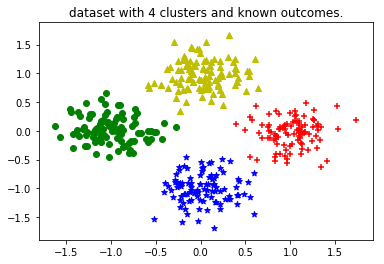

In [12]:
assigns = assign(datas, centers)
centers = calc_centers(datas, assigns)
plot_points(datas, assigns)

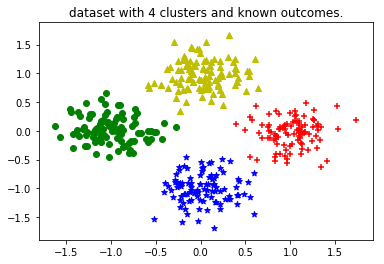

In [13]:
assigns = assign(datas, centers)
centers = calc_centers(datas, assigns)
plot_points(datas, assigns)

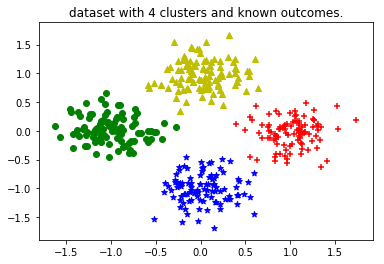

In [14]:
assigns = assign(datas, centers)
centers = calc_centers(datas, assigns)
plot_points(datas, assigns)

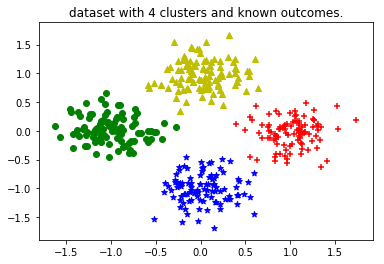

In [15]:
assigns = assign(datas, centers)
centers = calc_centers(datas, assigns)
plot_points(datas, assigns)

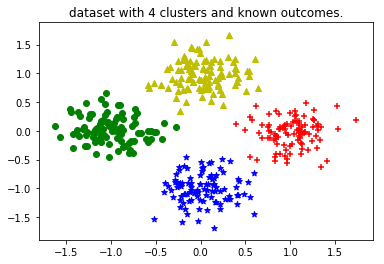

In [16]:
assigns = assign(datas, centers)
centers = calc_centers(datas, assigns)
plot_points(datas, assigns)

# 如何停止聚类
- 本次assign是否与前一次一致
- 本次各个中心点是否跟前一次差距不大 （距离<10-4)